# Data reading

In [66]:
#loading data
import pandas as pd
#scaling feature values
from sklearn.preprocessing import StandardScaler
#encoding target values
from sklearn.preprocessing import LabelEncoder
#shuffling data
from sklearn.utils import shuffle
#splitting the dataset into training and validation
from sklearn.model_selection import train_test_split
#plotting curves
import matplotlib.pyplot as plt

In [67]:
import os
os.chdir('/content/drive/MyDrive/Cursos FCFM/Semestre Ene 21 - Jun 21/Introduccion al aprendizaje profundo/Notebooks Data')

In [68]:
data=pd.read_csv('Churn_Modelling.csv')

In [70]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
data=shuffle(data)

In [73]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
484,485,15676519,George,615,Spain,Male,61,9,0.00,2,1,0,150227.85,1
9432,9433,15574142,Chuang,458,Germany,Female,28,2,171932.26,2,1,1,9578.24,0
7386,7387,15664083,Ulyanova,666,Germany,Female,37,2,158468.76,1,0,1,93266.01,0
8423,8424,15706799,Macknight,719,Spain,Male,44,4,0.00,1,0,0,84972.90,1
3158,3159,15811177,Beneventi,643,France,Female,31,3,167949.48,1,1,0,143162.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,6942,15628950,Coates,501,Germany,Male,25,6,104013.79,1,1,0,114774.35,0
223,224,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
3082,3083,15759066,Carpenter,483,France,Female,44,5,136836.49,1,1,0,192359.90,1
1053,1054,15798348,Chukwuebuka,600,Spain,Female,50,6,94684.27,1,1,1,50488.91,0


In [74]:
# En cada columna marca true en los datos nulos (datos faltantes)
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
484,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9432,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7386,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8423,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,False,False,False,False,False,False,False,False,False,False,False,False,False,False
223,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3082,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1053,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:

# .sum() abrevia la informacion de cada columna haciendo una suma
data.isnull().sum()
# En este caso no es necesario remover filas con datos faltantes

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [76]:
# Renombrar las covariables en una X, poner el target en y
# Quitar columnas que no son de interes
# axis = 1 significa que los labels representan columnas
# axis = 0 representaria revisar filas
X = data.drop(labels=['CustomerId', 'Surname',
 'RowNumber', 'Exited'], axis = 1)
y = data['Exited']

In [79]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
484,615,Spain,Male,61,9,0.00,2,1,0,150227.85
9432,458,Germany,Female,28,2,171932.26,2,1,1,9578.24
7386,666,Germany,Female,37,2,158468.76,1,0,1,93266.01
8423,719,Spain,Male,44,4,0.00,1,0,0,84972.90
3158,643,France,Female,31,3,167949.48,1,1,0,143162.34


In [80]:
y

484     1
9432    0
7386    0
8423    1
3158    0
       ..
6941    0
223     1
3082    1
1053    0
4561    0
Name: Exited, Length: 10000, dtype: int64

In [81]:
# object podemos pensarlo como string (cadenas de caracteres)
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [82]:
# Instanciando la funcion LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [83]:
X['Geography']

484       Spain
9432    Germany
7386    Germany
8423      Spain
3158     France
         ...   
6941    Germany
223      France
3082     France
1053      Spain
4561    Germany
Name: Geography, Length: 10000, dtype: object

In [84]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [85]:
label.fit_transform(X['Geography'])

array([2, 1, 1, ..., 0, 2, 1])

In [86]:
label.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [90]:
for x in  enumerate([4,3,6]):
  print(x)

(0, 4)
(1, 3)
(2, 6)


In [87]:
# enumerate asocia un conteo iniciando en cero a una lista
dict_geo = {x:y for x,y in enumerate(label.classes_)}
dict_geo

{0: 'France', 1: 'Germany', 2: 'Spain'}

In [91]:
X['Geography'] = label.fit_transform(X['Geography'])
dict_geo = {x:y for x,y in enumerate(label.classes_)}

In [92]:
X['Gender'] = label.fit_transform(X['Gender'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}
dict_gen

{0: 'Female', 1: 'Male'}

In [93]:
X.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
484,615,2,1,61,9,0.00,2,1,0,150227.85
9432,458,1,0,28,2,171932.26,2,1,1,9578.24
7386,666,1,0,37,2,158468.76,1,0,1,93266.01
8423,719,2,1,44,4,0.00,1,0,0,84972.90
3158,643,0,0,31,3,167949.48,1,1,0,143162.34
8600,710,0,1,43,9,128284.45,1,1,0,32996.89
7624,728,0,0,69,1,0.00,2,1,1,131804.86
103,528,2,1,36,7,0.00,2,1,0,60536.56
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
2403,641,0,0,26,4,91547.84,2,0,1,28157.34


In [129]:

# Reseteo con la X original
X = data.drop(labels=['CustomerId', 'Surname',
 'RowNumber', 'Exited'], axis = 1)

# Solo aplico label encoder al genero
X['Gender'] = label.fit_transform(X['Gender'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}

In [95]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
484,615,Spain,1,61,9,0.00,2,1,0,150227.85
9432,458,Germany,0,28,2,171932.26,2,1,1,9578.24
7386,666,Germany,0,37,2,158468.76,1,0,1,93266.01
8423,719,Spain,1,44,4,0.00,1,0,0,84972.90
3158,643,France,0,31,3,167949.48,1,1,0,143162.34


In [98]:
pd.get_dummies(X, drop_first=True, columns=['Geography'])

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
484,615,1,61,9,0.00,2,1,0,150227.85,0,1
9432,458,0,28,2,171932.26,2,1,1,9578.24,1,0
7386,666,0,37,2,158468.76,1,0,1,93266.01,1,0
8423,719,1,44,4,0.00,1,0,0,84972.90,0,1
3158,643,0,31,3,167949.48,1,1,0,143162.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6941,501,1,25,6,104013.79,1,1,0,114774.35,1,0
223,850,1,33,10,0.00,1,1,0,4861.72,0,0
3082,483,0,44,5,136836.49,1,1,0,192359.90,0,0
1053,600,0,50,6,94684.27,1,1,1,50488.91,0,1


In [130]:

# Aplicar onehotencoding a la geografia 
# Se quita una columna del onehotencoding para evitar colinealidad
# Si dejamos Geography_France se cumpliria que
# Geography_France = 1 - Geography_Germany - Geography_Spain
# es decir esas 3 columnas no serian linealmente independientes
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
y = data['Exited']

In [100]:
columns = X.columns
columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [101]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
484,615,1,61,9,0.00,2,1,0,150227.85,0,1
9432,458,0,28,2,171932.26,2,1,1,9578.24,1,0
7386,666,0,37,2,158468.76,1,0,1,93266.01,1,0
8423,719,1,44,4,0.00,1,0,0,84972.90,0,1
3158,643,0,31,3,167949.48,1,1,0,143162.34,0,0


In [102]:
X.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [131]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [132]:
X

array([[-0.36760852,  0.91241915,  2.10523565, ...,  0.87184294,
        -0.57873591,  1.74273971],
       [-1.99205231, -1.09598752, -1.04143285, ..., -1.57391324,
         1.72790383, -0.57380915],
       [ 0.16007704, -1.09598752, -0.18325053, ..., -0.11866654,
         1.72790383, -0.57380915],
       ...,
       [-1.73338292, -1.09598752,  0.4842246 , ...,  1.60447719,
        -0.57873591, -0.57380915],
       [-0.52281016, -1.09598752,  1.05634615, ..., -0.86251756,
        -0.57873591,  1.74273971],
       [-0.91598764,  0.91241915, -0.75537207, ...,  0.75167747,
         1.72790383, -0.57380915]])

In [133]:
# Media de los datos
X.mean(axis=0).round(2)


array([-0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.])

In [134]:
# varianza
X.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [135]:
X.mean(axis=0).round(2),X.var(axis=0)

(array([-0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [136]:
# Split dataset into training and testing
from sklearn.model_selection import train_test_split
# 20% de prueba 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2)

In [137]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# Linear regression sklearn

In [112]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, confusion_matrix

In [114]:
y_pred_raw = model_linear.predict(X_test)

In [115]:
y_pred_raw

array([0.30136185, 0.18631641, 0.12979489, ..., 0.21823706, 0.03631507,
       0.14523821])

In [116]:
y_pred = [1 if x>=0.5 else 0 for x in y_pred_raw]

In [119]:
y.value_counts() / len(y)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [121]:
#       Predicted
#       Neg  Pos   
# R  Neg   [[TN, FP ],
# e  Pos    [FN, TP]]
# a
# l
y_pred = [1 if x>=0.5 else 0 for x in y_pred_raw]
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[1579   35]
 [ 340   46]]
Accuracy:  0.8125
Precision:  0.5679012345679012
Recall:  0.11917098445595854
F1:  0.19700214132762311


# Linear regression stats

In [47]:
columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [122]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [123]:

# Split dataset into training and testing
from sklearn.model_selection import train_test_split
# 20% de prueba 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2)

In [124]:
import statsmodels.api as sm
X_train_linear = sm.add_constant(X_train)
model_linear = sm.OLS(y_train,X_train_linear).fit()
model_linear.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     88.03
Date:                Sat, 11 Sep 2021   Prob (F-statistic):          4.03e-103
Time:                        18:43:00   Log-Likelihood:                -1215.2
No. Observations:                 404   AIC:                             2456.
Df Residuals:                     391   BIC:                             2508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.7517      5.910      6.387      0.000      26.132      49.372
CRIM          -0.0860      0.042     -2.036      0.042      -0.169      -0.003
ZN             0.0437      0.016      2.785      0.006       0.013       0.074
INDUS          0.0636      0.070      0.911      0.363      -0.074       0.201
NOX          -18.8922      4.700     -4.020      0.000     -28.133      -9.652
RM             3.9118      0.479      8.159      0.000       2.969       4.855
AGE            0.0034      0.016      0.220      0.826      -0.027       0.034
DIS           -1.5128      0.228     -6.637      0.000      -1.961      -1.065
RAD            0.3475      0.077      4.538      0.000       0.197       0.498
TAX           -0.0135      0.004     -3.194      0.002      -0.022      -0.005
PTRATIO       -1.0085      0.151     -6.675      0.000      -1.306      -0.711
B              0.0097      0.003      2.942      0.003       0.003       0.016
LSTAT         -0.5627      0.058     -9.664      0.000      -0.677      -0.448
==============================================================================
Omnibus:                      142.509   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.239
Skew:                           1.527   Prob(JB):                    6.69e-124
Kurtosis:                       7.937   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

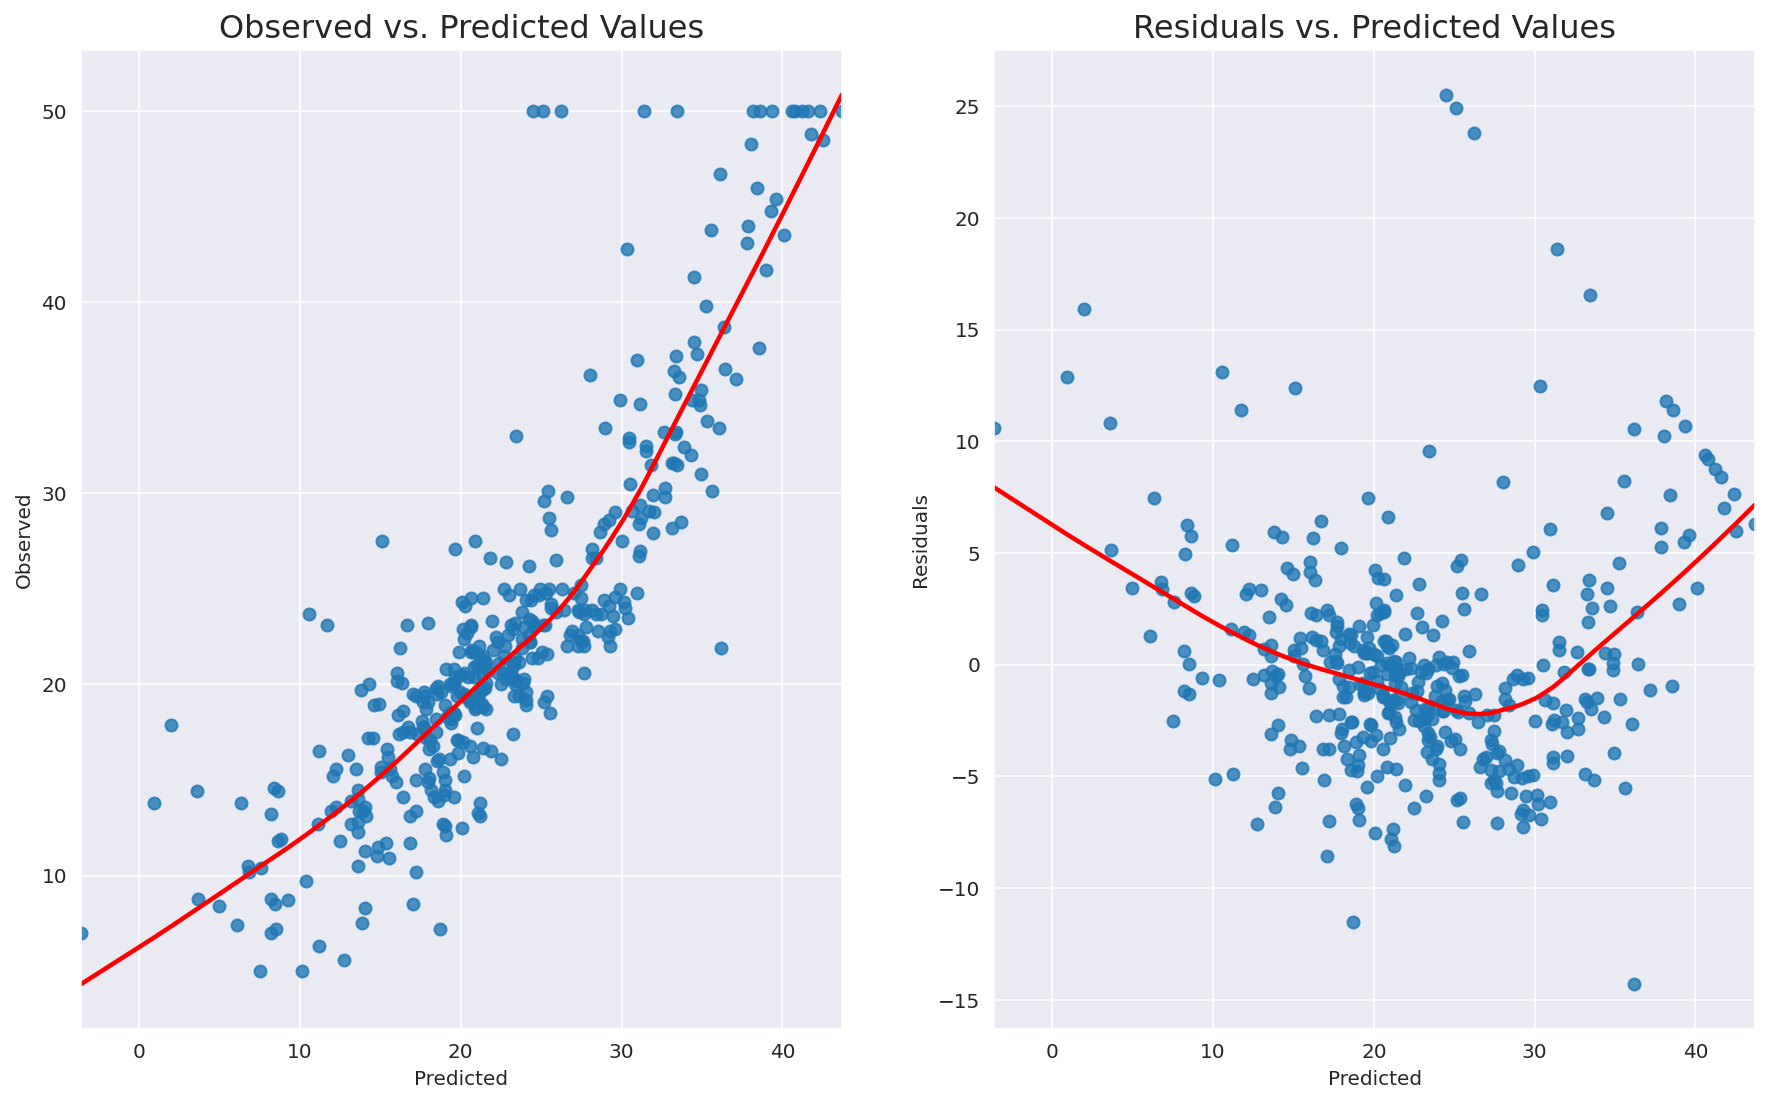

In [125]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y,X):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict(X)
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model_linear, y_train,X_train_linear)    


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  5.767143e+01
p-value                        5.977348e-08
f-value                        5.425852e+00
f p-value                      1.493608e-08

 Goldfeld-Quandt test ----
                value
F statistic  1.239605
p-value      0.070363

 Residuals plots ----


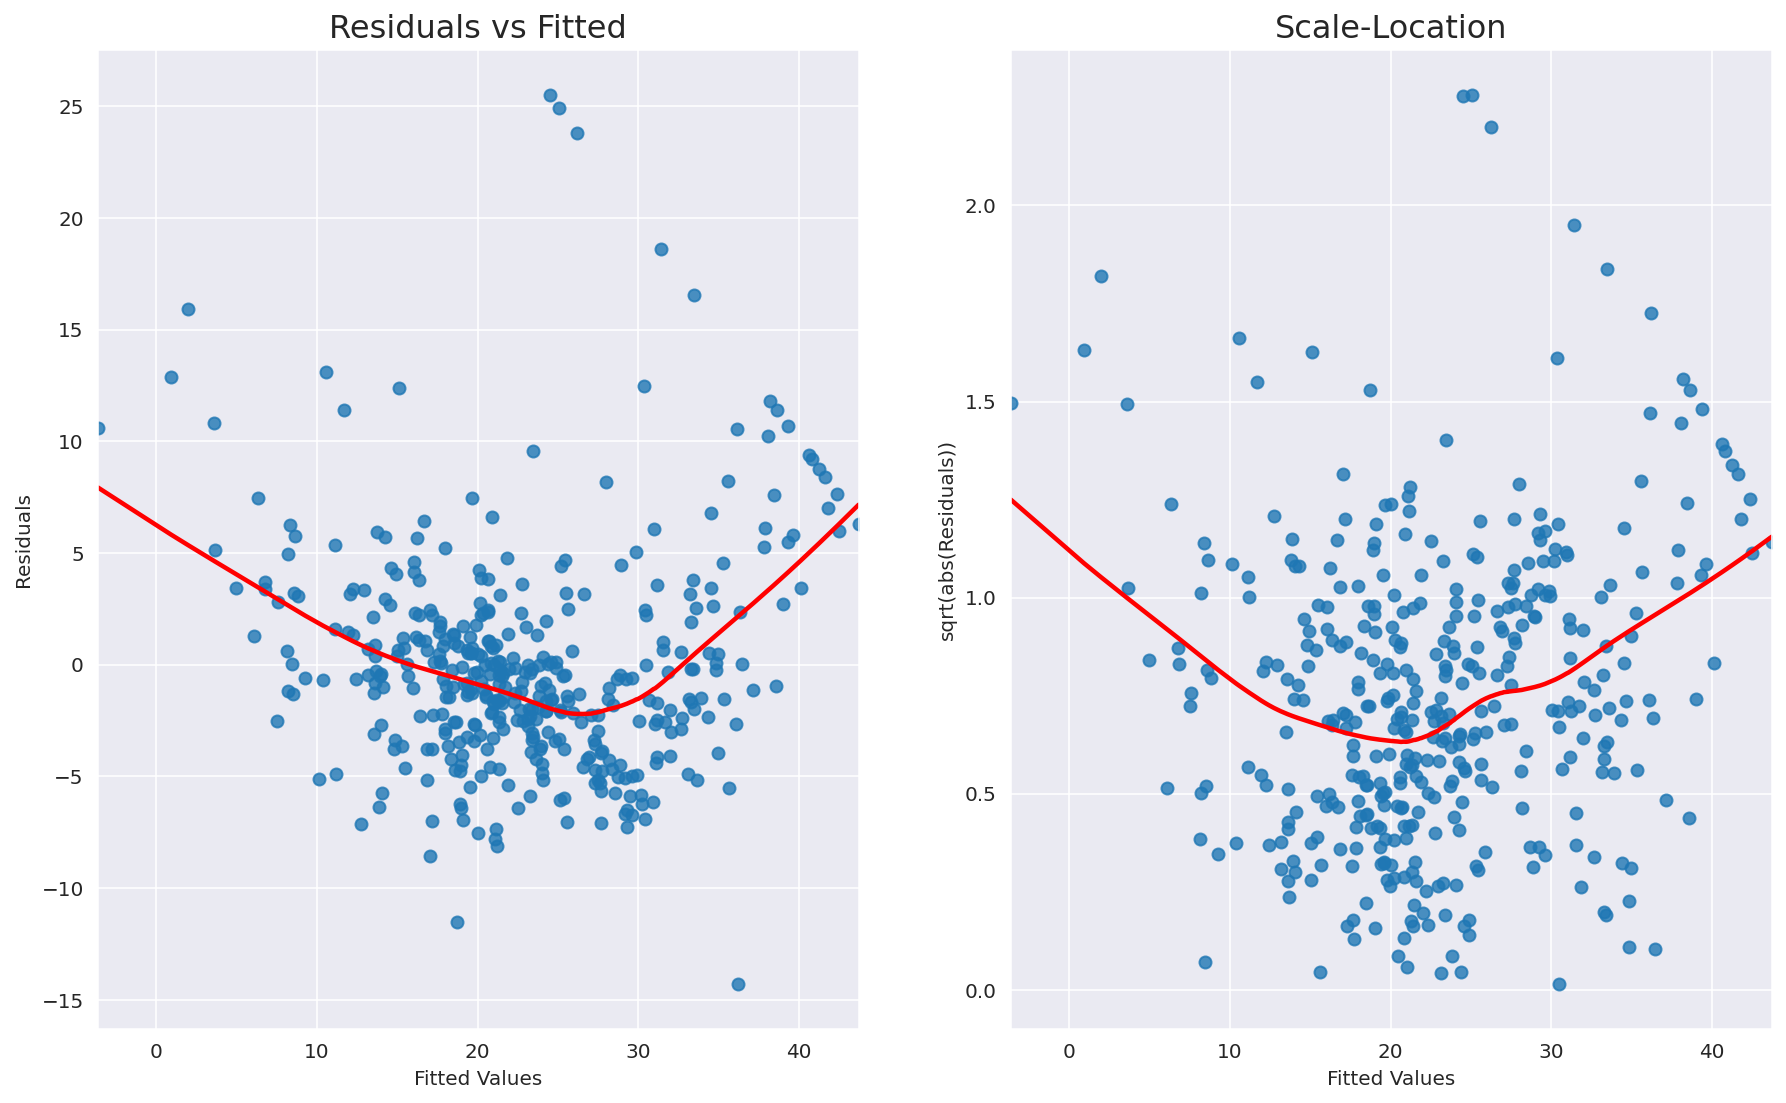

In [126]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_linear)

Jarque-Bera test ---- statistic: 567.2388, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9024, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3374, p-value: 0.0000
Anderson-Darling test ---- statistic: 8.0257, 5% critical value: 0.7790
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


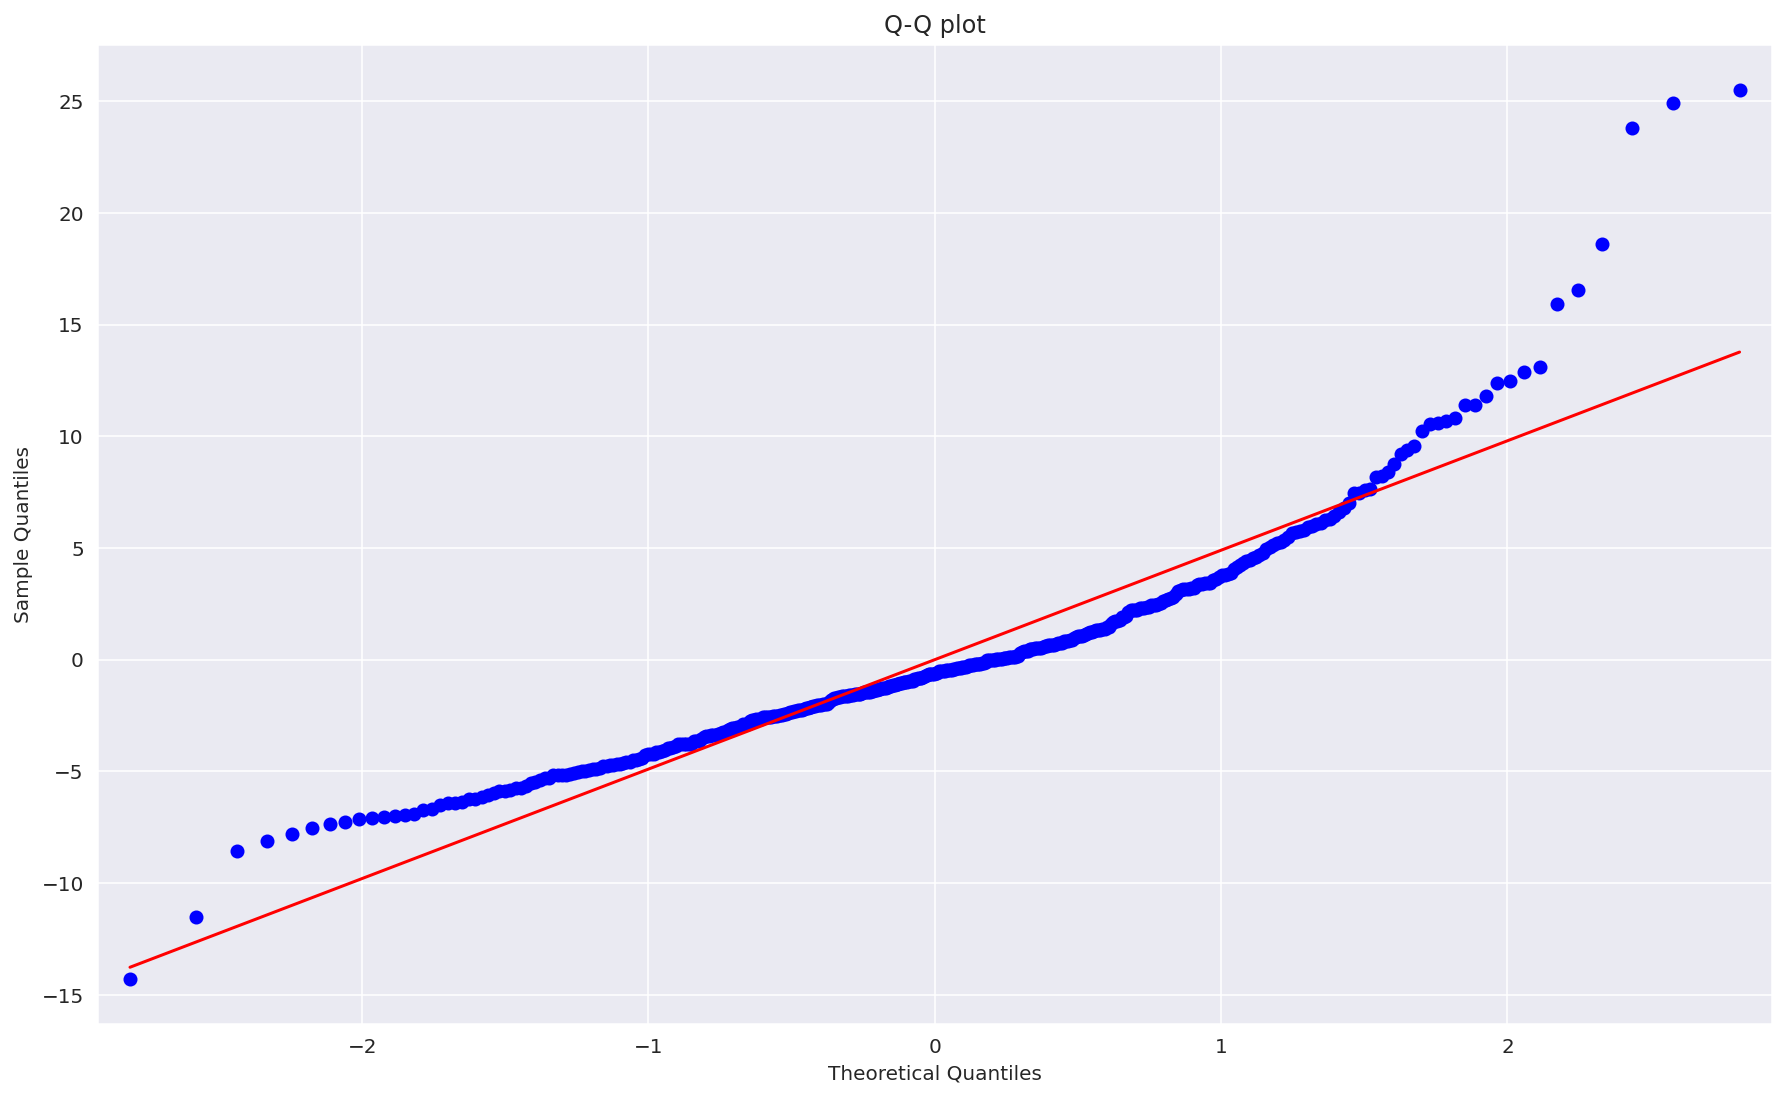

In [127]:

from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model_linear)

# Logistic

In [138]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred_raw = model_logistic.predict_proba(X_test)

In [140]:
y_pred_raw

array([[0.7026955 , 0.2973045 ],
       [0.74359062, 0.25640938],
       [0.82522041, 0.17477959],
       ...,
       [0.46944438, 0.53055562],
       [0.97812381, 0.02187619],
       [0.80365776, 0.19634224]])

In [141]:
import pandas as pd
import plotly.express as px

In [142]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [143]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics

,Cut,Accuracy,Recall,Precision,F1
0,0.000,0.1935,1.0,0.1935,0.324256
1,0.001,0.1935,1.0,0.1935,0.324256
2,0.002,0.1935,1.0,0.1935,0.324256
3,0.003,0.1935,1.0,0.1935,0.324256
4,0.004,0.1935,1.0,0.1935,0.324256
...,...,...,...,...,...
996,0.996,0.8065,0.0,0.0000,0.000000
997,0.997,0.8065,0.0,0.0000,0.000000
998,0.998,0.8065,0.0,0.0000,0.000000
999,0.999,0.8065,0.0,0.0000,0.000000


In [151]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
93,0.093,0.4485,0.899225,0.246459,0.386882
94,0.094,0.4525,0.894057,0.247143,0.387241
95,0.095,0.4540,0.891473,0.247312,0.387205
96,0.096,0.4560,0.886305,0.247296,0.386697
97,0.097,0.4580,0.883721,0.247647,0.386878
98,0.098,0.4625,0.881137,0.248905,0.388162
100,0.100,0.4670,0.878553,0.250184,0.389462
99,0.099,0.4645,0.878553,0.249267,0.388350
101,0.101,0.4695,0.875969,0.250740,0.389879
103,0.103,0.4770,0.873385,0.253184,0.392567


In [147]:
px.scatter(df_metrics,x='Precision',y='Recall',hover_data=['Cut'])

In [148]:
px.scatter(df_metrics,x='Precision',y='Recall',animation_frame='Cut')

# KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
y_pred_raw = model_knn.predict_proba(X_test)

In [163]:
y_pred_raw

array([[0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [164]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

In [165]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
400,0.400,0.787,0.555556,0.458422,0.502336
274,0.274,0.787,0.555556,0.458422,0.502336
272,0.272,0.787,0.555556,0.458422,0.502336
271,0.271,0.787,0.555556,0.458422,0.502336
270,0.270,0.787,0.555556,0.458422,0.502336
269,0.269,0.787,0.555556,0.458422,0.502336
268,0.268,0.787,0.555556,0.458422,0.502336
267,0.267,0.787,0.555556,0.458422,0.502336
266,0.266,0.787,0.555556,0.458422,0.502336
265,0.265,0.787,0.555556,0.458422,0.502336


In [166]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
1,0.001,0.6445,0.775194,0.324675,0.457666
2,0.002,0.6445,0.775194,0.324675,0.457666
3,0.003,0.6445,0.775194,0.324675,0.457666
4,0.004,0.6445,0.775194,0.324675,0.457666
5,0.005,0.6445,0.775194,0.324675,0.457666
6,0.006,0.6445,0.775194,0.324675,0.457666
7,0.007,0.6445,0.775194,0.324675,0.457666
8,0.008,0.6445,0.775194,0.324675,0.457666
9,0.009,0.6445,0.775194,0.324675,0.457666
10,0.010,0.6445,0.775194,0.324675,0.457666


# DT

In [167]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth= 3)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [168]:
from sklearn.tree import plot_tree


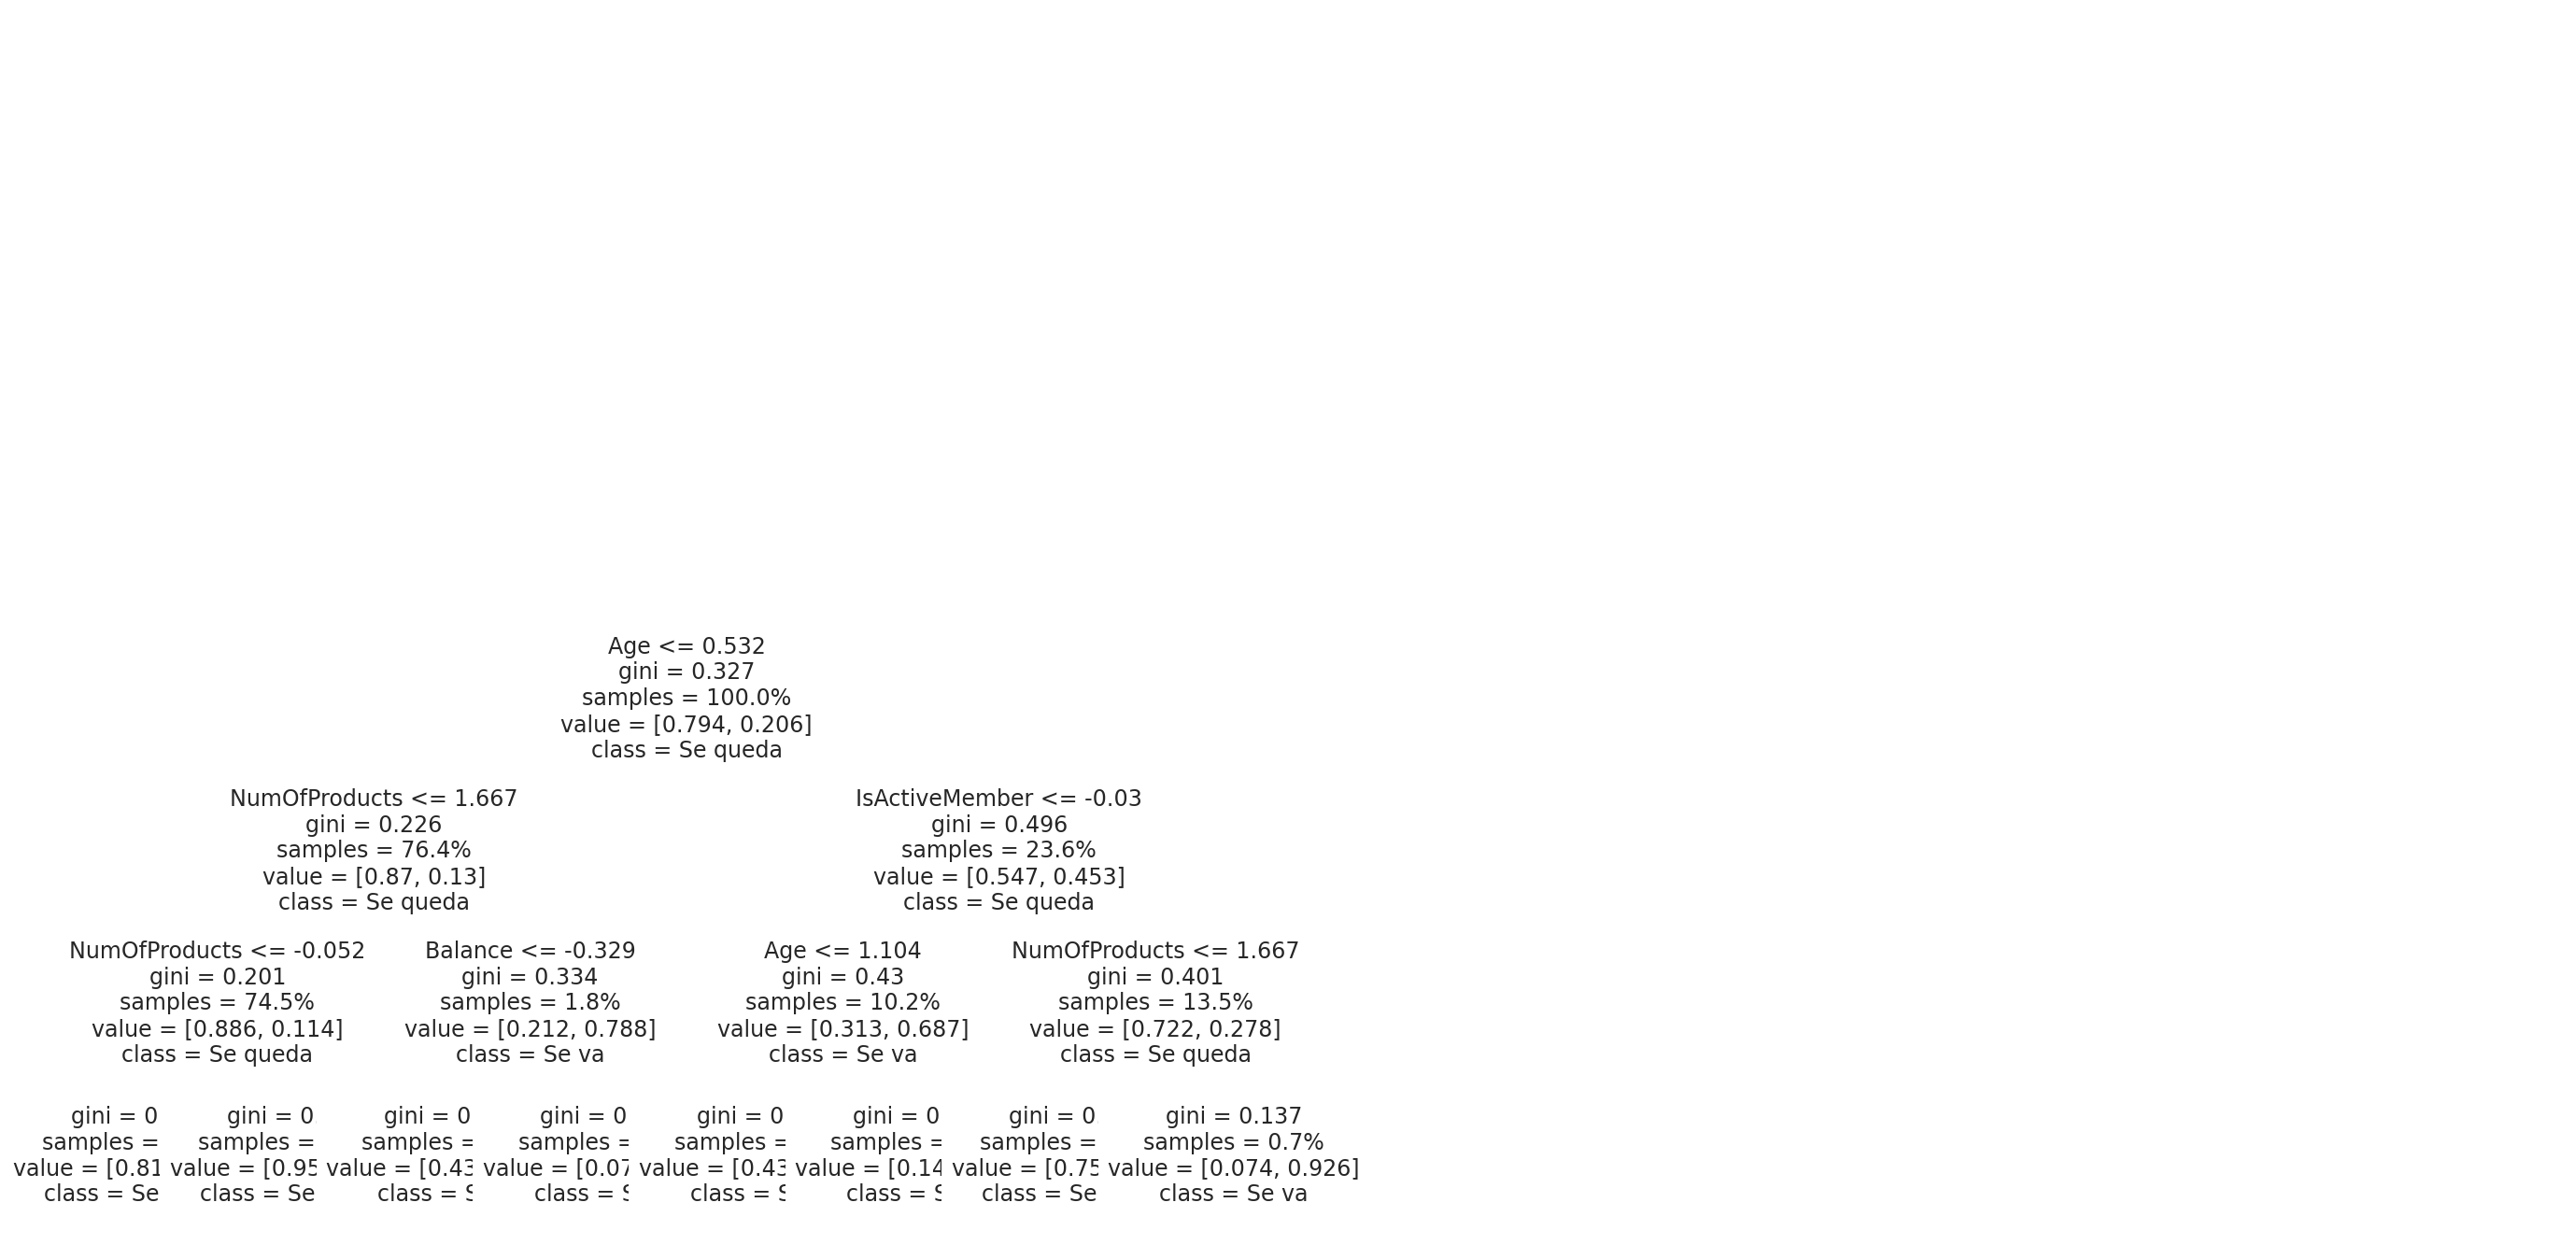

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plot_tree(model_dt,max_depth=3,feature_names=columns,class_names =['Se queda', 'Se va'],filled=False,
          impurity = True,proportion = True)
plt.show()

In [177]:
y_pred_raw = model_dt.predict_proba(X_test)

In [178]:
y_pred_raw

array([[0.75633528, 0.24366472],
       [0.43710021, 0.56289979],
       [0.95419592, 0.04580408],
       ...,
       [0.75633528, 0.24366472],
       [0.95419592, 0.04580408],
       [0.81824302, 0.18175698]])

In [179]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [180]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
234,0.234,0.7775,0.552972,0.440329,0.490263
210,0.210,0.7775,0.552972,0.440329,0.490263
218,0.218,0.7775,0.552972,0.440329,0.490263
217,0.217,0.7775,0.552972,0.440329,0.490263
216,0.216,0.7775,0.552972,0.440329,0.490263
215,0.215,0.7775,0.552972,0.440329,0.490263
214,0.214,0.7775,0.552972,0.440329,0.490263
213,0.213,0.7775,0.552972,0.440329,0.490263
212,0.212,0.7775,0.552972,0.440329,0.490263
211,0.211,0.7775,0.552972,0.440329,0.490263


In [181]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
46,0.046,0.535,0.881137,0.278367,0.423077
47,0.047,0.535,0.881137,0.278367,0.423077
48,0.048,0.535,0.881137,0.278367,0.423077
49,0.049,0.535,0.881137,0.278367,0.423077
50,0.050,0.535,0.881137,0.278367,0.423077
51,0.051,0.535,0.881137,0.278367,0.423077
52,0.052,0.535,0.881137,0.278367,0.423077
53,0.053,0.535,0.881137,0.278367,0.423077
54,0.054,0.535,0.881137,0.278367,0.423077
55,0.055,0.535,0.881137,0.278367,0.423077


In [182]:
# Reseteo con la X original
X = data.drop(labels=['CustomerId', 'Surname',
 'RowNumber', 'Exited'], axis = 1)
# Solo aplico label encoder al genero
X['Gender'] = label.fit_transform(X['Gender'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}
# Aplicar onehotencoding a la geografia 
# Se quita una columna del onehotencoding para evitar colinealidad
# Si dejamos Geography_France se cumpliria que
# Geography_France = 1 - Geography_Germany - Geography_Spain
# es decir esas 3 columnas no serian linealmente independientes
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
y = data['Exited']
columns = X.columns

In [183]:
# Split dataset into training and testing
from sklearn.model_selection import train_test_split
# 20% de prueba 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2)

In [184]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth= 3)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

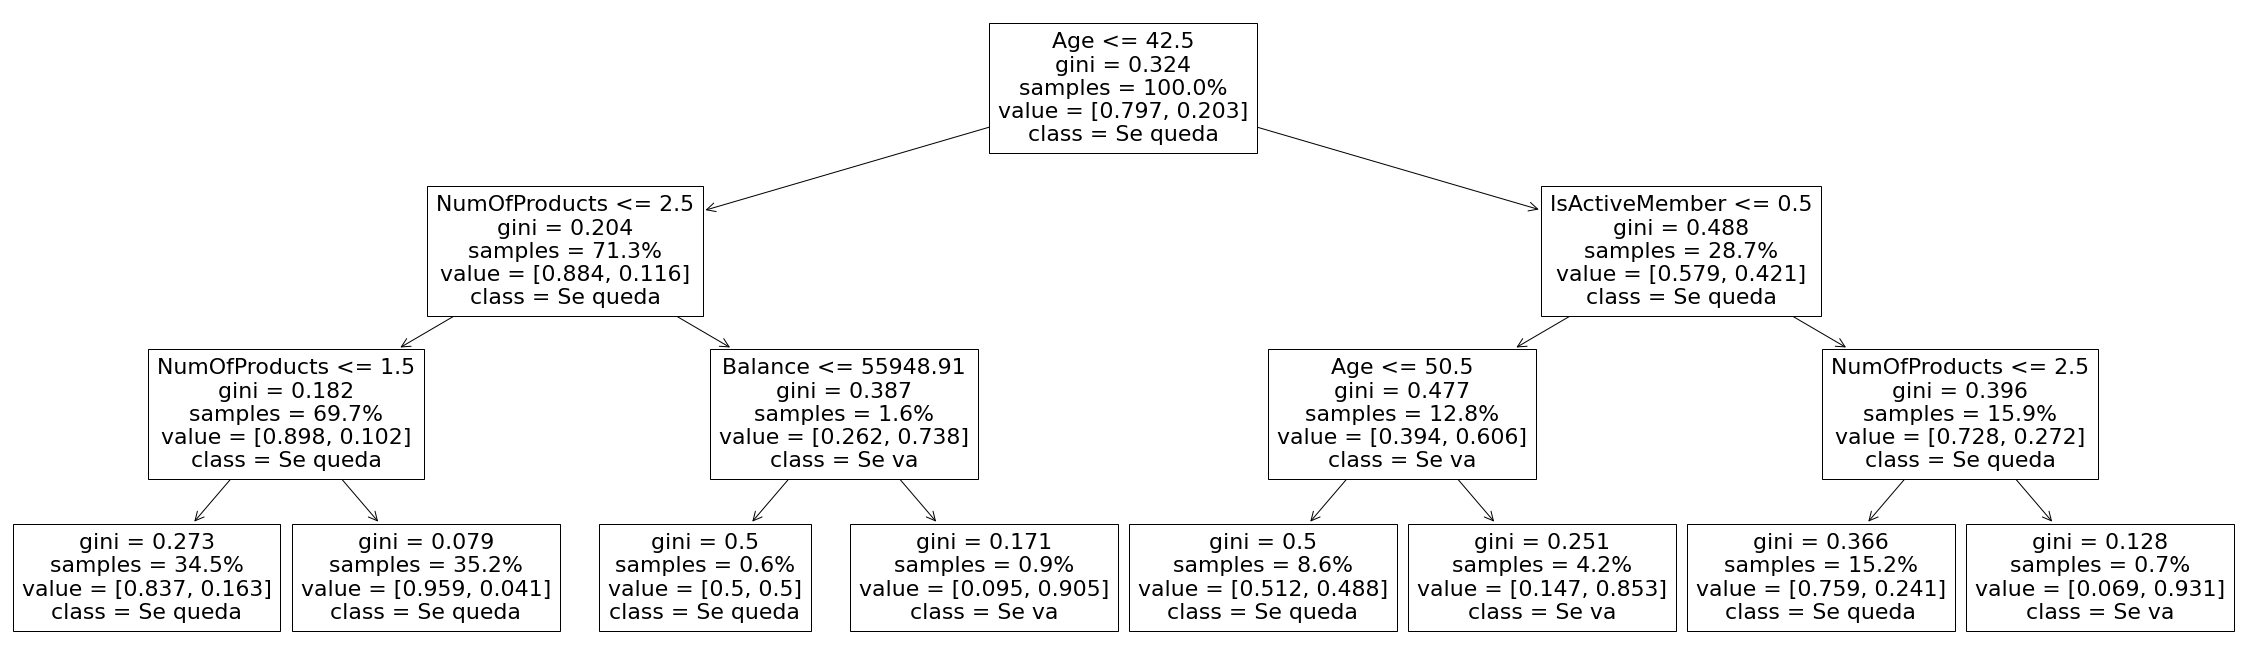

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,12))
plot_tree(model_dt,max_depth=3,feature_names=columns,class_names =['Se queda', 'Se va'],filled=False,
          impurity = True,proportion = True)
plt.show()

In [185]:
y_pred_raw = model_dt.predict_proba(X_test)

In [186]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [187]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
405,0.405,0.8375,0.479275,0.598706,0.532374
327,0.327,0.8375,0.479275,0.598706,0.532374
325,0.325,0.8375,0.479275,0.598706,0.532374
324,0.324,0.8375,0.479275,0.598706,0.532374
323,0.323,0.8375,0.479275,0.598706,0.532374
322,0.322,0.8375,0.479275,0.598706,0.532374
321,0.321,0.8375,0.479275,0.598706,0.532374
320,0.320,0.8375,0.479275,0.598706,0.532374
319,0.319,0.8375,0.479275,0.598706,0.532374
318,0.318,0.8375,0.479275,0.598706,0.532374


In [188]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
163,0.163,0.7615,0.639896,0.422222,0.508754
164,0.164,0.7615,0.639896,0.422222,0.508754
165,0.165,0.7615,0.639896,0.422222,0.508754
166,0.166,0.7615,0.639896,0.422222,0.508754
167,0.167,0.7615,0.639896,0.422222,0.508754
168,0.168,0.7615,0.639896,0.422222,0.508754
169,0.169,0.7615,0.639896,0.422222,0.508754
170,0.170,0.7615,0.639896,0.422222,0.508754
171,0.171,0.7615,0.639896,0.422222,0.508754
172,0.172,0.7615,0.639896,0.422222,0.508754


In [189]:
cut = 0.163
y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[1276  338]
 [ 139  247]]
Accuracy:  0.7615
Precision:  0.4222222222222222
Recall:  0.6398963730569949
F1:  0.5087538619979403
